In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
X = pd.read_csv("Training Data/Logistic_X_Train.csv").values
y = pd.read_csv("Training Data/Logistic_Y_Train.csv").values
y = y.reshape(-1,)

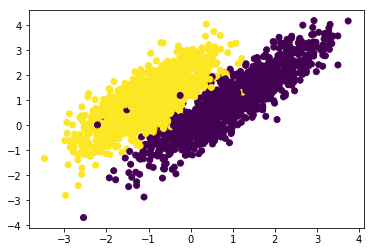

In [3]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()


## Logistic Regression Function

In [4]:
def hypothesis(x,w,b):
    h = np.dot(x,w) + b
    return sigmoid(h)

In [5]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

In [6]:
def error(x,y,w,b):
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += (y[i] * (np.log2(hx)) + (1 - y[i])* np.log2(1 - hx))
    
    return -err/m

In [7]:
def gradient(x,y,w,b):
    
    m = x.shape[0]
#     print(w)
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_b += (y[i] - hx)
        grad_w += (y[i] - hx)*x[i]
        
    grad_b /= m
    grad_w /= m
    
    return [grad_w,grad_b]

In [8]:
def gradientDescent(x,y,w,b,learning_rate = 0.1):
    
    
    err = error(x,y,w,b)
    
    
    [grad_w, grad_b] = gradient(x,y,w,b)
    
    w = w + learning_rate * grad_w
    b = b + learning_rate * grad_b
    
    return err,w,b

In [9]:
def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if confidence>=0.5:
        return 1
    else:
        return 0

In [10]:
loss = []
acc = []

W = 2*np.random.random((X.shape[1],))
b = 5*np.random.random()

In [36]:
for i in range(500):
    l,W,b = gradientDescent(X, y, W, b, learning_rate=0.8)

    loss.append(l)

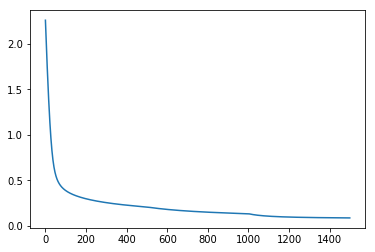

In [37]:
plt.plot(loss)

In [38]:
x_test = np.linspace(-4,4,10)
y_test = -(W[0]*x_test + b)/W[1]

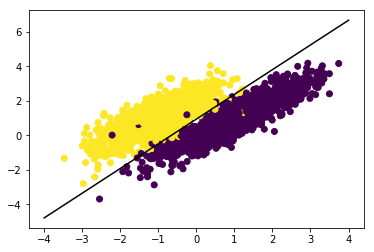

In [39]:
plt.scatter(X[:,0],X[:,1], c=y)
# plt.scatter(X2[:,0],X2[:,1])
plt.plot(x_test,y_test, color="black")
plt.show()

In [40]:
print(W)
print(b)

[-5.53087768  3.85998638]
-3.6402855937752805


# Using sklearn

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(X, y)

C:\Users\Mohit Uniyal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
lr.coef_

array([[-5.79058611,  4.08545549]])

In [45]:
lr.intercept_

array([-3.86661824])

In [46]:
W

array([-5.53087768,  3.85998638])

In [47]:
b

-3.6402855937752805